<a href="https://colab.research.google.com/github/WoogiWooks/DLCV_New/blob/main/9_Custom_Data_%EC%A0%9C%EC%9E%91(yaml_%ED%8C%8C%EC%9D%BC_%EC%9E%91%EC%84%B1_%EB%B0%8F_Annotation)_%ED%95%98%EC%97%AC_Ultralytics_YOLO_%EB%8F%99%EC%9E%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **직접 Custom Dataset을 만들기 위한 Annotation Tool**
* 서버 기반 작업 : https://cvat.org/tasks
* 크롬 환경에서 사용 권장
* Local Install : https://openvinotoolkit.github.io/cvat/docs/administration/basics/installation/
* 학습시 **여러 각도의 Object Data**를 사용하는 것이 좋음 (ex. 뒷모습을 통해서도 Detection)

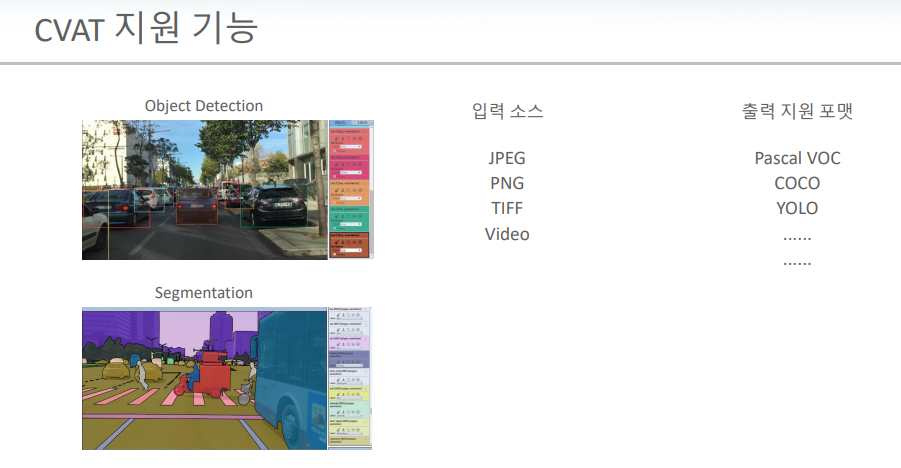

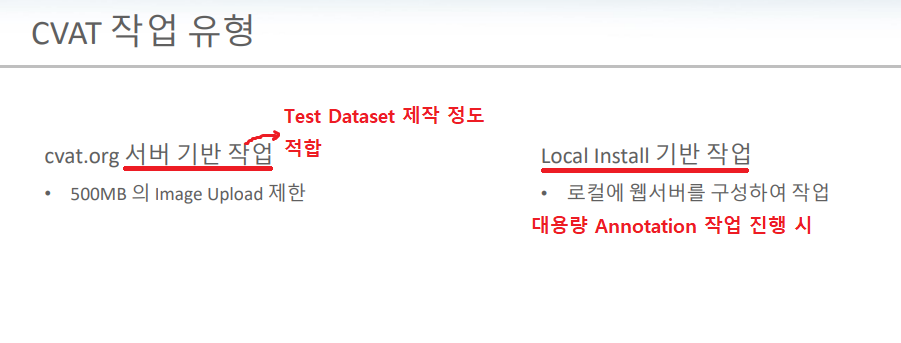

## **CVAT 사용 과정**

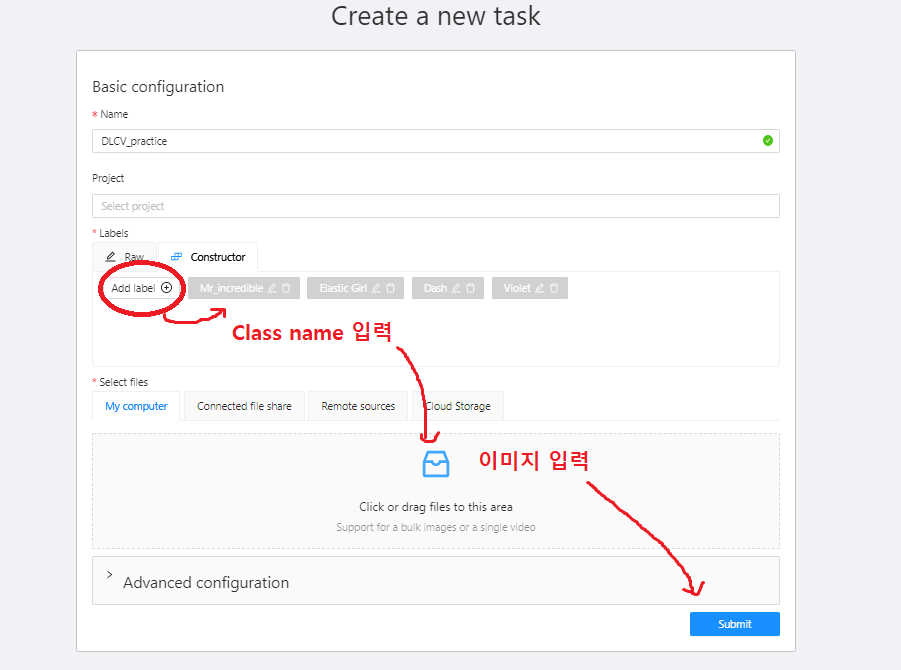

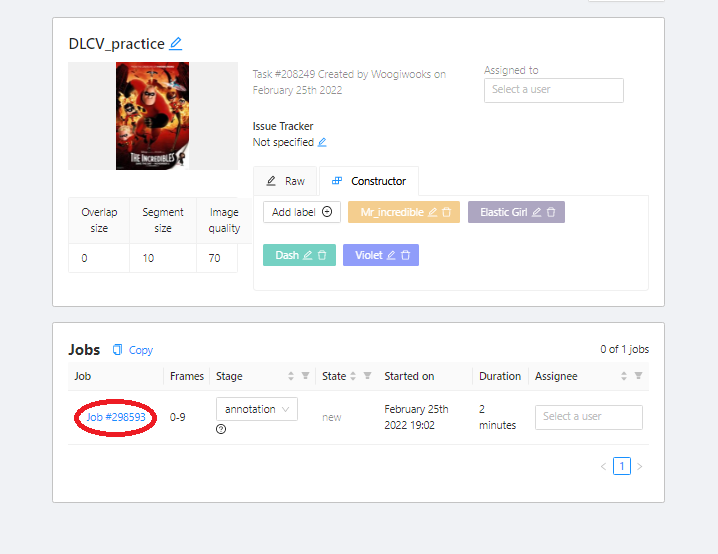

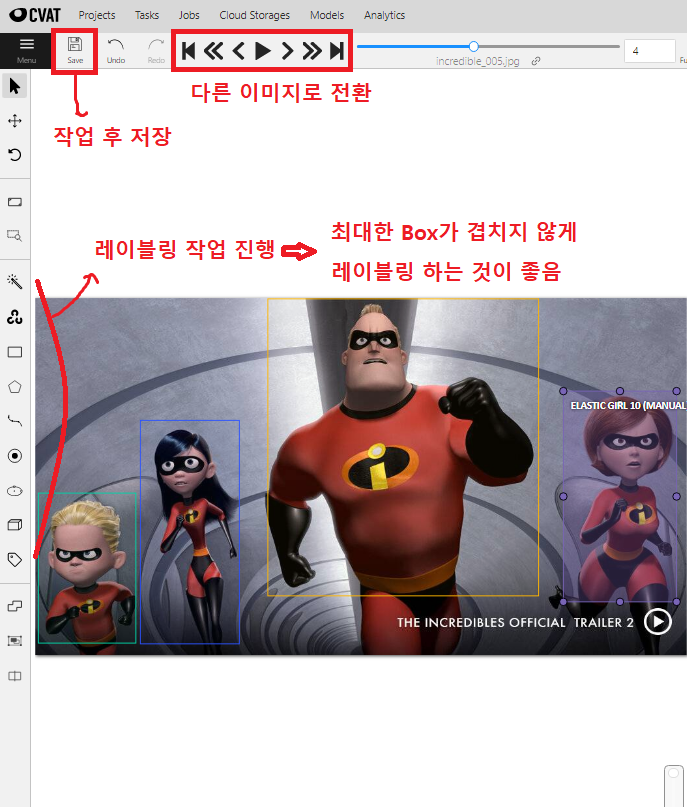

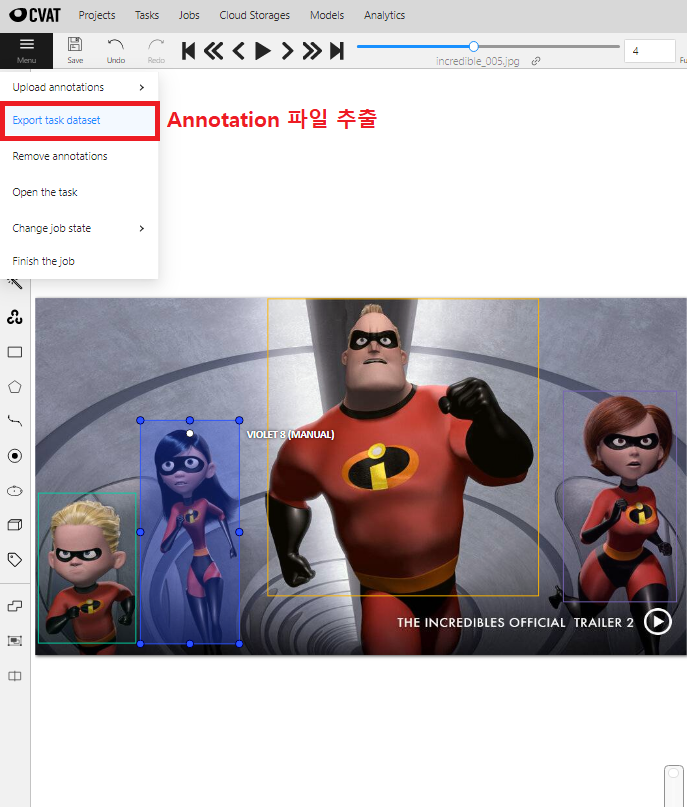

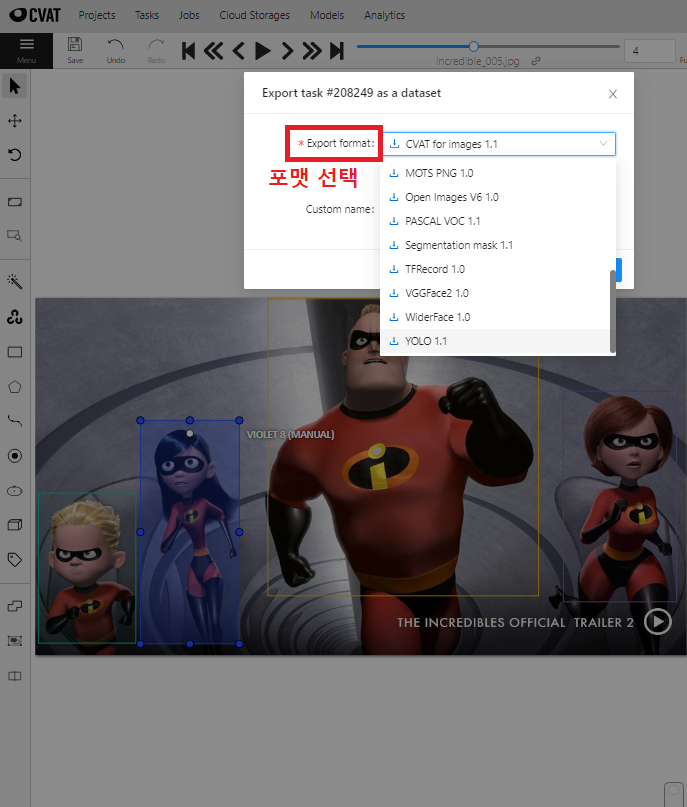

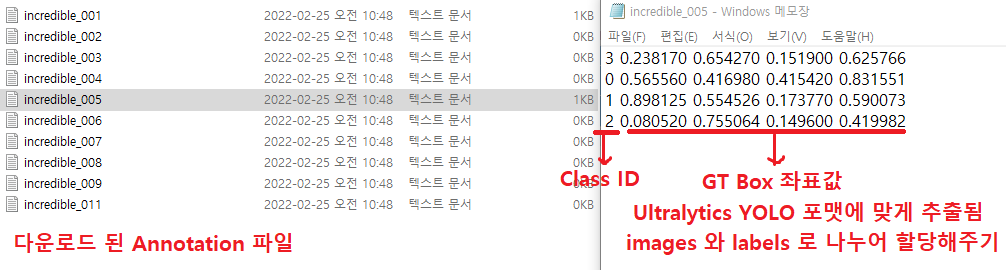

# **Ultralytics YOLO v3 다운로드**

In [ ]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9964, done.
remote: Total 9964 (delta 0), reused 0 (delta 0), pack-reused 9964
Receiving objects: 100% (9964/9964), 9.31 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (6721/6721), done.
     |████████████████████████████████| 596 kB 23.6 MB/s 
     |████████████████████████████████| 1.7 MB 60.4 MB/s 
     |████████████████████████████████| 144 kB 66.0 MB/s 
     |████████████████████████████████| 181 kB 67.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


# **Custom Dataset을 통한 Train**
* **yaml 파일 작성법** : https://rfriend.tistory.com/540

In [ ]:
# Annotation 작업 수행된 파일 다운로드
# 나중엔 내 Data에 직접 Annotation을 수행해서 써야지

!wget -O incredibles.zip https://github.com/chulminkw/DLCV/raw/master/incredibles.zip
!mkdir /content/incredibles
!unzip incredibles.zip -d /content/incredibles

In [ ]:
# 학습 위한 yaml 파일
# Colab 환경에서 yaml 편집 어려워 github에서 다운로드 해옴
# 데이터가 적어 학습데이터로 검증까지 진행함. 고려

!wget -O /content/incredibles/incredibles.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml

--2022-02-25 11:00:00--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/incredibles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘/content/incredibles/incredibles.yaml’

/content/incredible 100%[===================>]     190  --.-KB/s    in 0s      

2022-02-25 11:00:00 (12.9 MB/s) - ‘/content/incredibles/incredibles.yaml’ saved [190/190]



In [ ]:
###  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. epoch는 시간관계상 50번으로 설정

!cd /content/yolov3; python train.py --img 320 --batch 8 --epochs 50 --data /content/incredibles/incredibles.yaml --weights yolov3.pt \
                                     --project=/content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장 --name incredibles --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov3.pt, cfg=, data=/content/incredibles/incredibles.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장, name=incredibles, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0

# **Train 이후 Inference 수행**

## **Image Inference**

In [ ]:
!cd /content/yolov3;python detect.py --source /content/incredibles/images/train/incredible_040.jpg \
                            --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장/incredibles/weights/best.pt'], source=/content/incredibles/images/train/incredible_040.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.8 GFLOPs
image 1/1 /content/incredibles/images/train/incredible_040.jpg: 352x640 1 mr_incredible, 1 elastic_girl, Done. (0.044s)
Speed: 0.5ms pre-process, 44.3ms inference, 3.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


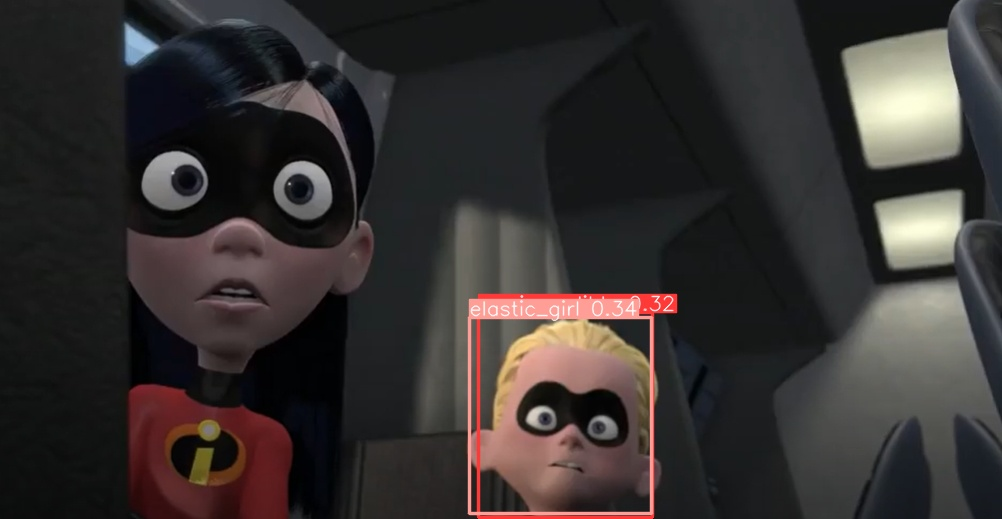

In [ ]:
# 학습 횟수가 부족하여 결과가 정확하지 못함

from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/incredible_040.jpg', width=800)

## **Video Inference**

In [ ]:
!wget -O /content/incredibles/incredibles.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true

--2022-02-25 11:35:11--  https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4 [following]
--2022-02-25 11:35:11--  https://github.com/chulminkw/DLCV/raw/master/data/video/incredibles.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4 [following]
--2022-02-25 11:35:11--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/incredibles.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connecte

In [ ]:
!cd /content/yolov3;python detect.py --source /content/incredibles/incredibles.mp4 \
                            --weights /content/drive/MyDrive/Colab\ Notebooks/DLCV/8.\ weight\ 저장/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/Colab Notebooks/DLCV/8. weight 저장/incredibles/weights/best.pt'], source=/content/incredibles/incredibles.mp4, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-7-g0519223 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.8 GFLOPs
video 1/1 (1/589) /content/incredibles/incredibles.mp4: 288x640 1 elastic_girl, Done. (0.064s)
video 1/1 (2/589) /content/incredibles/incredibles.mp4: 288x640 1 elastic_girl, Done. (0.057s)
video 1/1 (3/589) /content/incredibles/incredibles.mp4: 288x640 1 elastic_girl, Done. (0.041s)
video 1/1 (4/589) /conte